## 1.2 - Ambiente e bibliotecas

In [245]:
import bs4
from bs4 import BeautifulSoup #Transforma a resposta do URLOPEN em objeto navegavel.
import urllib.request as urllib_request
from urllib.request import Request, urlopen, urlretrieve #que faz a requisiçao da pagina e obtem a resposta para mim
from urllib.request import URLError, HTTPError
import pandas as pd

print('BeautifulSoup ->', bs4.__version__)
print('urllib ->', urllib_request.__version__)
print('pandas ->', pandas.__version__)

BeautifulSoup -> 4.11.1
urllib -> 3.9
pandas -> 1.4.4


## 1.3 - Meu primeiro scraping

In [246]:
url = 'https://alura-site-scraping.herokuapp.com/hello-world.php'

response = urlopen(url) #acessar e obter o site que sera armazenado
html = response.read()

html #porem na maneira que importa não é muito intuitiva, basta usar o beautifulsoup

b'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">\r\n\t<link rel="stylesheet" href="css/styles.css" media="all">\r\n\r\n\t<script src="https://code.jquery.com/jquery-1.12.4.js"></script>\r\n\t<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js" integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa" crossorigin="anonymous"></script>\r\n\t<script type="text/javascript" src="js/index.js"></script>\r\n\r\n</head>\r\n<body cz-shortcut-listen="true">\r\n    <noscript>You need to enable JavaScript to run this app.</noscript>\r\n\r\n    <div id="root">\r\n        <h

In [247]:
#melhorando a visualizaçao de cima
soup = BeautifulSoup(html, 'html.parser')

soup

<!DOCTYPE html>

<html lang="pt-br">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Alura Motors</title>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/>
<link href="css/styles.css" media="all" rel="stylesheet"/>
<script src="https://code.jquery.com/jquery-1.12.4.js"></script>
<script crossorigin="anonymous" integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa" src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"></script>
<script src="js/index.js" type="text/javascript"></script>
</head>
<body cz-shortcut-listen="true">
<noscript>You need to enable JavaScript to run this app.</noscript>
<div id="root">
<header>
<nav class="navbar navbar-inverse" style="margin-bottom: 0;">
<div class="container" styl

In [248]:
soup.find('h1', id='hello-world') #localizaçao a tag do site selecionado

<h1 id="hello-world">Hello World!!!</h1>

In [249]:
soup.find('h1', id='hello-world').get_text() #indo direto na string e pegando o conteudo da tag

'Hello World!!!'

In [250]:
soup.find('p') #exemplo de funcionamento, o comando vai varrer todo o site e mostrar as tags <p>

<p class="definition"><b>Web Scraping</b> é o termo utilizado para definir a prática de coletar automaticamente informações na Internet. Isto é feito, geralmente, por meio de programas que simulam a navegação humana na Web.</p>

In [251]:
soup.find('p').get_text() #mesma coisa, porem somente para o texto

'Web Scraping é o termo utilizado para definir a prática de coletar automaticamente informações na Internet. Isto é feito, geralmente, por meio de programas que simulam a navegação humana na Web.'

In [252]:
#exercicio dado em aula
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = 'https://alura-site-scraping.herokuapp.com/hello-world.php'

response = urlopen(url)
html = response.read()

soup = BeautifulSoup(html, 'html.parser')

soup.find('h1', {'class': 'sub-header'}).get_text()

'Curso de Web Scraping'

## Obtendo e tratando o conteudo HTML

In [253]:
#obtendo site que dão erro 403
url = 'https://www.alura.com.br'
headers = {'User-Agent': #utilizado para acessar o site sem ter o erro 403
           'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36 Edg/106.0.1370.34'}

try: #tratamento de erro 
    req = Request(url, headers = headers)
    response = urlopen(req)
    print(response.read()) 
    #O código vai testar o comando e se não apresentar erra, executa.
    #Se apresentar o erro, vai rodar o comando abaixo
    
except HTTPError as e: #mosta o erro (403) e o motivo (forbiden)
    print(e.status, e.reason)
except URLError as e: #mostra o erro na url e o motivo (exemplo de digitar o nome da pagina errado)
    print(e.reason) 

b'<!DOCTYPE html><html\nlang="pt-BR"><head><meta\ncharset="UTF-8"><meta\nname="viewport" content="width=device-width,initial-scale=1,minimum-scale=1.0"><title>Alura | Cursos online de Tecnologia</title><meta\nname="description" content="Aprenda Programa\xc3\xa7\xc3\xa3o, Front-end, Back-end, Data Science, UX, DevOps, Inova\xc3\xa7\xc3\xa3o e Gest\xc3\xa3o na maior plataforma de tecnologia do Brasil"><link\nrel="canonical" href="https://www.alura.com.br"><link\nrel="icon" href="/assets/favicon.1647533642.ico" /><link\nhref="https://fonts.googleapis.com/css2?display=swap&family=Inter:wght@400;700;900&family=Roboto+Mono:wght@400;700&display=swap" rel="stylesheet" crossorigin><link\nrel="preconnect" href="https://fonts.gstatic.com/" crossorigin><link\nrel="stylesheet" href="/bundle,base/_reset,base/base,base/buttons,base/colors-apostilas,base/colors,base/titulos.1653434924.css"><link\nrel="stylesheet" href="/bundle,home/homeNova/career-colors,home/homeNova/careers,home/homeNova/cases,home/

### Tratamento de String

In [254]:
from urllib.request import urlopen

url = 'https://alura-site-scraping.herokuapp.com/index.php'

response = urlopen(url)
html = response.read()
html


b'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\r\n\t<style>\r\n\t\t/*Regra para a animacao*/\r\n\t\t@keyframes spin {\r\n\t\t\t0% { transform: rotate(0deg); }\r\n\t\t\t100% { transform: rotate(360deg); }\r\n\t\t}\r\n\t\t/*Mudando o tamanho do icone de resposta*/\r\n\t\tdiv.glyphicon {\r\n\t\t\tcolor:#6B8E23;\r\n\t\t\tfont-size: 38px;\r\n\t\t}\r\n\t\t/*Classe que mostra a animacao \'spin\'*/\r\n\t\t.loader {\r\n\t\t\tborder: 16px solid #f3f3f3;\r\n\t\t\tborder-radius: 50%;\r\n\t\t\tborder-top: 16px solid #3498db;\r\n\t\t\twidth: 80px;\r\n\t\t\theight: 80px;\r\n\t\t\t-webkit-animation: spin 2s linear infinite;\r\n\t\t\tanimation: spin 2s linear infinite;\r\n\t\t}\r\n\t</style>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuH

#### Convertendo o tipo bytes para string

In [255]:
type(html) #como não foi codificado corretamente (caracteres especiais) é preciso converter em string

bytes

In [256]:
html = html.decode('utf-8')

In [257]:
type(html)

str

In [258]:
html #caracteres especiais foram incluidos e substituidos.

'<!DOCTYPE html>\r\n<html lang="pt-br">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n\r\n    <title>Alura Motors</title>\r\n\r\n\t<style>\r\n\t\t/*Regra para a animacao*/\r\n\t\t@keyframes spin {\r\n\t\t\t0% { transform: rotate(0deg); }\r\n\t\t\t100% { transform: rotate(360deg); }\r\n\t\t}\r\n\t\t/*Mudando o tamanho do icone de resposta*/\r\n\t\tdiv.glyphicon {\r\n\t\t\tcolor:#6B8E23;\r\n\t\t\tfont-size: 38px;\r\n\t\t}\r\n\t\t/*Classe que mostra a animacao \'spin\'*/\r\n\t\t.loader {\r\n\t\t\tborder: 16px solid #f3f3f3;\r\n\t\t\tborder-radius: 50%;\r\n\t\t\tborder-top: 16px solid #3498db;\r\n\t\t\twidth: 80px;\r\n\t\t\theight: 80px;\r\n\t\t\t-webkit-animation: spin 2s linear infinite;\r\n\t\t\tanimation: spin 2s linear infinite;\r\n\t\t}\r\n\t</style>\r\n\t<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHA

#### ELiminando os caracteres de tabulaçao, quebra de linha e outros

In [259]:
html.split() #transforme todo tipo de separaçao em array do python

['<!DOCTYPE',
 'html>',
 '<html',
 'lang="pt-br">',
 '<head>',
 '<meta',
 'charset="utf-8">',
 '<meta',
 'name="viewport"',
 'content="width=device-width,',
 'initial-scale=1,',
 'shrink-to-fit=no">',
 '<title>Alura',
 'Motors</title>',
 '<style>',
 '/*Regra',
 'para',
 'a',
 'animacao*/',
 '@keyframes',
 'spin',
 '{',
 '0%',
 '{',
 'transform:',
 'rotate(0deg);',
 '}',
 '100%',
 '{',
 'transform:',
 'rotate(360deg);',
 '}',
 '}',
 '/*Mudando',
 'o',
 'tamanho',
 'do',
 'icone',
 'de',
 'resposta*/',
 'div.glyphicon',
 '{',
 'color:#6B8E23;',
 'font-size:',
 '38px;',
 '}',
 '/*Classe',
 'que',
 'mostra',
 'a',
 'animacao',
 "'spin'*/",
 '.loader',
 '{',
 'border:',
 '16px',
 'solid',
 '#f3f3f3;',
 'border-radius:',
 '50%;',
 'border-top:',
 '16px',
 'solid',
 '#3498db;',
 'width:',
 '80px;',
 'height:',
 '80px;',
 '-webkit-animation:',
 'spin',
 '2s',
 'linear',
 'infinite;',
 'animation:',
 'spin',
 '2s',
 'linear',
 'infinite;',
 '}',
 '</style>',
 '<link',
 'rel="stylesheet"',
 'hre

In [260]:
" ".join(html.split()) #join vai deixar tudo em 1 linha e vai separar pelo que estiver dentro das aspas

'<!DOCTYPE html> <html lang="pt-br"> <head> <meta charset="utf-8"> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"> <title>Alura Motors</title> <style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao \'spin\'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style> <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous"> <link rel="stylesheet" href="css/styles.css" media="all"> <script src="https://code.jquery.com/jquery-1.12.4.js"></script> <script src="https://

#### Eliminando espaços em branco entre as TAGS

In [261]:
" ".join(html.split()).replace('> <', '><') #retirando o espaço em branco

'<!DOCTYPE html><html lang="pt-br"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao \'spin\'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous"><link rel="stylesheet" href="css/styles.css" media="all"><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script src="https://maxcdn.boo

#### Função de tratamento de strings

In [262]:
#vriando uma funçao para tratar html
def trata_html(input): #vai tratar o que eu colocar como input
    return" ".join(input.split()).replace('> <', '><')

In [263]:
html = trata_html(html)
html

'<!DOCTYPE html><html lang="pt-br"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao \'spin\'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous"><link rel="stylesheet" href="css/styles.css" media="all"><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script src="https://maxcdn.boo

## 3 - BEAUTIFULSOUP

beautifulsoup - https://www.crummy.com/software/BeautifulSoup/bs4/doc/

parser - https://www.crummy.com/software/BeautifulSoup/bs4/doc/#parser-installation

### Criando objeto Beautifulsoup

In [264]:
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>
<html lang="pt-br"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><title>Alura Motors</title><style> /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } </style><link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/><link href="css/styles.css" media="all" rel="stylesheet"/><script src="https://code.jquery.com/jquery-1.12.4.js"></script><script crossorigin="anonymou

In [265]:
type(soup)

bs4.BeautifulSoup

In [266]:
print(soup.prettify()) #organiza a identaçao

<!DOCTYPE html>
<html lang="pt-br">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <title>
   Alura Motors
  </title>
  <style>
   /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; }
  </style>
  <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/>
  <link href="css/styles.css" media="all" rel="stylesheet"/>
  <script src="https://code.jquery.com/jquery-1.12.4.js">
  

### Acessando tags

In [267]:
soup.html.head.title

<title>Alura Motors</title>

In [268]:
soup.div #primeira div que encontra na pagina de forma sequencial.

<div aria-labelledby="loadingModal_label" class="modal fade" data-backdrop="static" id="loadingModal" role="dialog" tabindex="-1"><div class="modal-dialog" role="document"><div class="modal-content"><div class="modal-header"><h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5></div><div class="modal-body"><div class="alert" role="alert"><center><div class="loader" id="loader"></div><br/><h4><b id="loadingModal_content"></b></h4></center></div></div></div></div></div>

In [269]:
#acessando outras divs
soup.div.div.div.h5
#porem existe maneiras mais faceis

<h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5>

### Acessando o conteudo das tags

In [270]:
soup.title.get_text()
#retorna somente o texto sem a tag

'Alura Motors'

In [271]:
soup.h5.getText() #outra maneira

'Aguarde... '

### Acessando os atributos de uma tag

In [272]:
#acessar tag img
soup.img

<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>

In [273]:
soup.img.attrs #retorna um dicionario python

{'src': 'img/alura-logo.svg',
 'class': ['d-inline-block', 'align-top'],
 'alt': 'Alura'}

In [274]:
soup.img.attrs.keys()

dict_keys(['src', 'class', 'alt'])

In [275]:
soup.img.attrs.values()

dict_values(['img/alura-logo.svg', ['d-inline-block', 'align-top'], 'Alura'])

In [276]:
soup.img['class']

['d-inline-block', 'align-top']

In [277]:
soup.img.get('src')

'img/alura-logo.svg'

## 4 - Pesquisando com BeautifulSoup

### Metodo find() e findAll()

#### Método Find()

In [278]:
soup.find('img')

<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>

#### Metodo FindAll()

In [279]:
soup.findAll('img')

[<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/

#### Parametros findAll

In [280]:
soup.findAll('img', limit= 3)[0] #consigo selecionar tags expecificas do codigo

<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>

In [281]:
soup('img')

[<img alt="Alura" class="d-inline-block align-top" src="img/alura-logo.svg"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/

In [282]:
soup.findAll(['h1', 'h2', 'h3', 'h4', 'h5', 'h6']) #encontrando tags especificas

[<h5 class="modal-title" id="loadingModal_label"><span class="glyphicon glyphicon-refresh"></span>Aguarde... </h5>,
 <h4><b id="loadingModal_content"></b></h4>,
 <h1 class="sub-header">Veículos de Luxo Novos e Usados - Todas as Marcas</h1>]

In [283]:
soup.findAll('p')

[<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>,
 <p class="txt-category badge badge-secondary inline">USADO</p>,
 <p class="txt-motor">Motor 1.8 16v</p>,
 <p class="txt-description">Ano 1993 - 55.286 km</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-value">R$ 338.000</p>,
 <p class="txt-name inline">BMW M2</p>,
 <p class="txt-category badge badge-secondary inline">USADO</p>,
 <p class="txt-motor">Motor 3.0 32v</p>,
 <p class="txt-description">Ano 2018 - 83.447 km</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-value">R$ 346.000</p>,
 <p class="txt-name inline">ALFA</p>,
 <p class="txt-category badge badge-secondary inline">USADO</p>,
 <p class="txt-motor">Motor 1.8 16v</p>,
 <p class="txt-description">Ano 2004 - 19.722 km</p>,
 <p class="txt-location">Rio de Janeiro - RJ</p>,
 <p class="txt-value">R$ 480.000</p>,
 <p class="txt-name inline">PUECH</p>,
 <p class="txt-category badge badge-secondary inline">USADO</p>,
 <p class="txt-moto

In [284]:
soup.findAll('p', {'class': 'txt-value'}) #sendo mais especifico na busca

[<p class="txt-value">R$ 338.000</p>,
 <p class="txt-value">R$ 346.000</p>,
 <p class="txt-value">R$ 480.000</p>,
 <p class="txt-value">R$ 133.000</p>,
 <p class="txt-value">R$ 175.000</p>,
 <p class="txt-value">R$ 239.000</p>,
 <p class="txt-value">R$ 115.000</p>,
 <p class="txt-value">R$ 114.000</p>,
 <p class="txt-value">R$ 75.000</p>,
 <p class="txt-value">R$ 117.000</p>]

In [285]:
soup.findAll('p', text = 'Belo Horizonte - MG')

[<p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>,
 <p class="txt-location">Belo Horizonte - MG</p>]

In [286]:
#buscando por atributo
soup.findAll('img', alt='Foto')

[<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg" width="220"/>,
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/aston-martin/aston-martin-2977916__340.jpg" width="220"/>,
 <img al

In [287]:
for iten in soup.findAll('img', alt = 'Foto'):
    print(iten.get('src'))
    
#exemplo do que dá para fazer

https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/bmw-m2/bmw-m2-2970882__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/alfa/alfa-1823056__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/puech/puech-4055386__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-murcielago/lamborghini-murcielago-2872974__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/aston-martin/aston-martin-2977916__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/tvr/tvr-2943925__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/excalibur/excalibur-2916730__340.jpg
https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/mclaren/mclaren-2855240__340.jpg
htt

In [288]:
soup.findAll('p', class_="txt-value" )

[<p class="txt-value">R$ 338.000</p>,
 <p class="txt-value">R$ 346.000</p>,
 <p class="txt-value">R$ 480.000</p>,
 <p class="txt-value">R$ 133.000</p>,
 <p class="txt-value">R$ 175.000</p>,
 <p class="txt-value">R$ 239.000</p>,
 <p class="txt-value">R$ 115.000</p>,
 <p class="txt-value">R$ 114.000</p>,
 <p class="txt-value">R$ 75.000</p>,
 <p class="txt-value">R$ 117.000</p>]

In [289]:
soup.findAll(text = True) #lista com todos textos

['html',
 'Alura Motors',
 " /*Regra para a animacao*/ @keyframes spin { 0% { transform: rotate(0deg); } 100% { transform: rotate(360deg); } } /*Mudando o tamanho do icone de resposta*/ div.glyphicon { color:#6B8E23; font-size: 38px; } /*Classe que mostra a animacao 'spin'*/ .loader { border: 16px solid #f3f3f3; border-radius: 50%; border-top: 16px solid #3498db; width: 80px; height: 80px; -webkit-animation: spin 2s linear infinite; animation: spin 2s linear infinite; } ",
 ' requisitar("https://alura-scraping.herokuapp.com/produtos?_page="+1+"&_limit=10") ',
 'You need to enable JavaScript to run this app.',
 'Aguarde... ',
 'Motors ',
 'Hello World',
 'Anúncios',
 'Veículos de Luxo Novos e Usados - Todas as Marcas',
 '246 veículos encontrados',
 'Página 1 de 25',
 'LAMBORGHINI AVENTADOR',
 'USADO',
 'Motor 1.8 16v',
 'Ano 1993 - 55.286 km',
 '► 4 X 4',
 '► Câmera de estacionamento',
 '► Controle de tração',
 '► Sensor de estacionamento',
 '...',
 'Belo Horizonte - MG',
 'R$ 338.000',

### Outros métodos de pesquisa

- #### *findParent(tag, attributes, text, **kwargs)*

- #### *findParents(tag, attributes, text, limit, **kwargs)*

##### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-parents-and-find-parent

> **Observação:**
> - *findParent()* e *findParents()* também podem ser utilizados como *find_parent()* e *find_parents()*, respectivamente.
---
- #### *findNextSibling(tag, attributes, text, **kwargs)*

- #### *findNextSiblings(tag, attributes, text, limit, **kwargs)*

- #### *findPreviousSibling(tag, attributes, text, **kwargs)*

- #### *findPreviousSiblings(tag, attributes, text, limit, **kwargs)*

##### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-next-siblings-and-find-next-sibling
##### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-previous-siblings-and-find-previous-sibling

> **Observação:**
> - *findNextSibling()*, *findNextSiblings()*, *findPreviousSibling()* e *findPreviousSiblings()* também podem ser utilizados como *find_next_sibling()*, *find_next_siblings()*, *find_previous_sibling()* e *find_previous_siblings()*, respectivamente.
---
- #### *findNext(tag, attributes, text, **kwargs)*

- #### *findAllNext(tag, attributes, text, limit, **kwargs)*

- #### *findPrevious(tag, attributes, text, **kwargs)*

- #### *findAllPrevious(tag, attributes, text, limit, **kwargs)*

##### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all-next-and-find-next
##### https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all-previous-and-find-previous

> **Observação:**
> - *findNext()*, *findAllNext()*, *findPrevious* e *findAllPrevious* também podem ser utilizados como *find_next()*, *find_all_next()*, *find_previous()* e *find_all_previous()*, respectivamente.

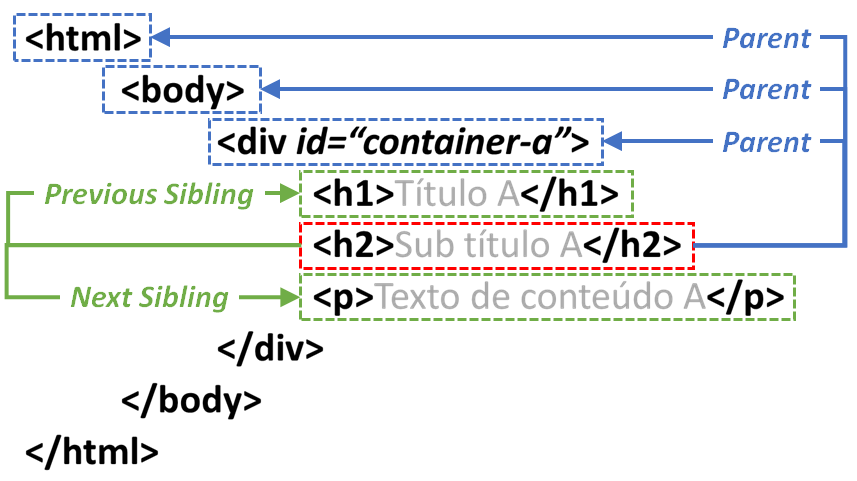

In [290]:
html_teste = """
    <html>
        <body>
            <div id="container-a">
                <h1>Título A</h1>
                <h2 class="ref-a">Sub título A</h2>
                <p>Texto de conteúdo A</p>
            </div>
            <div id="container-b">
                <h1>Título B</h1>
                <h2 class="ref-b">Sub título B</h2>
                <p>Texto de conteúdo B</p>
            </div>
        </body>
    </html>
"""

In [291]:
html_teste

'\n    <html>\n        <body>\n            <div id="container-a">\n                <h1>Título A</h1>\n                <h2 class="ref-a">Sub título A</h2>\n                <p>Texto de conteúdo A</p>\n            </div>\n            <div id="container-b">\n                <h1>Título B</h1>\n                <h2 class="ref-b">Sub título B</h2>\n                <p>Texto de conteúdo B</p>\n            </div>\n        </body>\n    </html>\n'

In [292]:
html_teste = trata_html(html_teste)
html_teste

'<html><body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>'

In [293]:
soup = BeautifulSoup(html_teste, 'html.parser')
soup

<html><body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>

#### Parents

In [294]:
soup.find('h2')

<h2 class="ref-a">Sub título A</h2>

In [295]:
soup.find('h2').find_parent('div')

<div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div>

In [296]:
soup.find('h2').find_parents()

[<div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div>,
 <body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body>,
 <html><body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>,
 <html><body><div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div><div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div></body></html>]

In [297]:
soup.findAll('h2')

[<h2 class="ref-a">Sub título A</h2>, <h2 class="ref-b">Sub título B</h2>]

In [298]:
for item in soup.findAll('h2'):
    print(item.find_parent('div'))

<div id="container-a"><h1>Título A</h1><h2 class="ref-a">Sub título A</h2><p>Texto de conteúdo A</p></div>
<div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div>


#### Siblings

In [299]:
soup.find('h2').findNextSibling() #vai encontrar o proximo sibling apos o h2

<p>Texto de conteúdo A</p>

In [300]:
soup.find('h2').findPreviousSibling() #encontra o sibling anterior

<h1>Título A</h1>

In [301]:
soup.find('p').findPreviousSiblings() #Encontra todos siblings anteriores

[<h2 class="ref-a">Sub título A</h2>, <h1>Título A</h1>]

#### Next e Previous

In [302]:
soup.find('h2').findNext()

<p>Texto de conteúdo A</p>

In [303]:
soup.find('h2').findPrevious()

<h1>Título A</h1>

In [304]:
soup.find('h1').findAllNext() #tudo que tiver após o h1

[<h2 class="ref-a">Sub título A</h2>,
 <p>Texto de conteúdo A</p>,
 <div id="container-b"><h1>Título B</h1><h2 class="ref-b">Sub título B</h2><p>Texto de conteúdo B</p></div>,
 <h1>Título B</h1>,
 <h2 class="ref-b">Sub título B</h2>,
 <p>Texto de conteúdo B</p>]

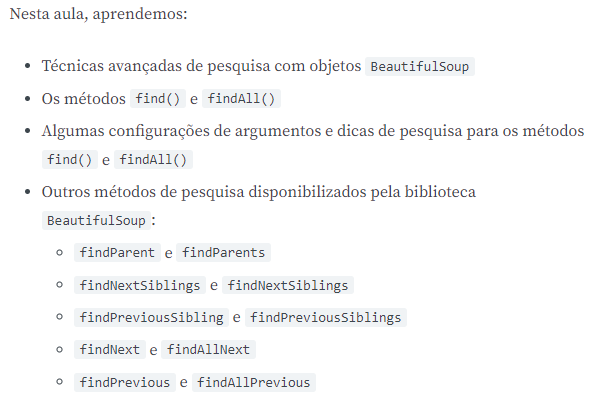

## 5 - WEB Scraping do site AluraMotors - Obtendo dados

In [305]:
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html lang="pt-br">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Alura Motors</title>
<style>
		/*Regra para a animacao*/
		@keyframes spin {
			0% { transform: rotate(0deg); }
			100% { transform: rotate(360deg); }
		}
		/*Mudando o tamanho do icone de resposta*/
		div.glyphicon {
			color:#6B8E23;
			font-size: 38px;
		}
		/*Classe que mostra a animacao 'spin'*/
		.loader {
			border: 16px solid #f3f3f3;
			border-radius: 50%;
			border-top: 16px solid #3498db;
			width: 80px;
			height: 80px;
			-webkit-animation: spin 2s linear infinite;
			animation: spin 2s linear infinite;
		}
	</style>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" rel="stylesheet"/>
<link href="css/styles.css" media="all" rel="stylesheet"/>
<script src="https://code.jquery

#### Criando variaveis para armazenar info

In [306]:
cards = []
card = {}

#### Obtendo dados dos primeiro cards

In [307]:
anuncio = soup.find('div', {'class':'well card'})
anuncio

<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
</div>
<div class="col-md-6 body-card">
<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>
<p class="txt-location">Belo Horizonte - MG</p>
</div>
<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>
</div>

In [308]:
anuncio.find('div', {'class': 'value-card'})

<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>

In [309]:
#pegando somente o valor
anuncio.find('p', {'class': 'txt-value'}).getText()

'R$ 338.000'

In [310]:
card['value'] = anuncio.find('p', {'class': 'txt-value'}).getText()
card

{'value': 'R$ 338.000'}

### Obtendo info sobre os dados

In [311]:
anuncio.find('div', {'class': 'body-card'}).findAll('p') #procurando dentro da div body-card as tags P

[<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>,
 <p class="txt-category badge badge-secondary inline">USADO</p>,
 <p class="txt-motor">Motor 1.8 16v</p>,
 <p class="txt-description">Ano 1993 - 55.286 km</p>,
 <p class="txt-location">Belo Horizonte - MG</p>]

In [312]:
infos = anuncio.find('div', {'class': 'body-card'}).findAll('p')

In [313]:
for info in infos:
    print(info.get('class')) #jogando dentro de info cada item da lista class contida em infos

['txt-name', 'inline']
['txt-category', 'badge', 'badge-secondary', 'inline']
['txt-motor']
['txt-description']
['txt-location']


In [314]:
for info in infos:
    print(info.get('class')[0], ' - ', info.getText())

txt-name  -  LAMBORGHINI AVENTADOR
txt-category  -  USADO
txt-motor  -  Motor 1.8 16v
txt-description  -  Ano 1993 - 55.286 km
txt-location  -  Belo Horizonte - MG


In [315]:
for info in infos:
    print(info.get('class')[0].split('-'), ' - ', info.getText())

['txt', 'name']  -  LAMBORGHINI AVENTADOR
['txt', 'category']  -  USADO
['txt', 'motor']  -  Motor 1.8 16v
['txt', 'description']  -  Ano 1993 - 55.286 km
['txt', 'location']  -  Belo Horizonte - MG


In [316]:
for info in infos:
    print(info.get('class')[0].split('-')[-1], ' - ', info.getText())

name  -  LAMBORGHINI AVENTADOR
category  -  USADO
motor  -  Motor 1.8 16v
description  -  Ano 1993 - 55.286 km
location  -  Belo Horizonte - MG


In [317]:
for info in infos:
    card[info.get('class')[0].split('-')[-1]] = info.getText()

In [318]:
card

{'value': 'R$ 338.000',
 'name': 'LAMBORGHINI AVENTADOR',
 'category': 'USADO',
 'motor': 'Motor 1.8 16v',
 'description': 'Ano 1993 - 55.286 km',
 'location': 'Belo Horizonte - MG'}

### Continuação de obtençao de dados

In [319]:
anuncio.find('div', {'class': 'body-card'}).find('ul')

<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>

In [320]:
anuncio.find('div', {'class': 'body-card'}).find('ul').findAll('li')

[<li class="txt-items">► 4 X 4</li>,
 <li class="txt-items">► Câmera de estacionamento</li>,
 <li class="txt-items">► Controle de tração</li>,
 <li class="txt-items">► Sensor de estacionamento</li>,
 <li class="txt-items">...</li>]

In [321]:
items = anuncio.find('div', {'class': 'body-card'}).find('ul').findAll('li')

In [322]:
#o ultimo item da lista é ...
#como eliminar o ultimo item da lista
items.pop()

<li class="txt-items">...</li>

In [323]:
items

[<li class="txt-items">► 4 X 4</li>,
 <li class="txt-items">► Câmera de estacionamento</li>,
 <li class="txt-items">► Controle de tração</li>,
 <li class="txt-items">► Sensor de estacionamento</li>]

In [324]:
for item in items:
    print(item.getText())

► 4 X 4
► Câmera de estacionamento
► Controle de tração
► Sensor de estacionamento


In [325]:
for item in items:
    print(item.getText().replace('►', ''))

 4 X 4
 Câmera de estacionamento
 Controle de tração
 Sensor de estacionamento


In [326]:
acessorios = []
for item in items:
    acessorios.append(item.getText().replace('►', '')) #vai ler e adionar cada item dentro da lista
    
acessorios

[' 4 X 4',
 ' Câmera de estacionamento',
 ' Controle de tração',
 ' Sensor de estacionamento']

In [327]:
card['items'] = acessorios #vai jogar a lista acessorios dentro da variavel card

In [328]:
card

{'value': 'R$ 338.000',
 'name': 'LAMBORGHINI AVENTADOR',
 'category': 'USADO',
 'motor': 'Motor 1.8 16v',
 'description': 'Ano 1993 - 55.286 km',
 'location': 'Belo Horizonte - MG',
 'items': [' 4 X 4',
  ' Câmera de estacionamento',
  ' Controle de tração',
  ' Sensor de estacionamento']}

#### Criando DataFrame com os dados coletados

In [329]:
import pandas as pd

In [330]:
dataset = pd.DataFrame(card)

dataset

,value,name,category,motor,description,location,items
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,4 X 4
1,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,Câmera de estacionamento
2,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,Controle de tração
3,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,Sensor de estacionamento


In [331]:
dataset = pd.DataFrame.from_dict(card, orient= 'index')
dataset

,0
value,R$ 338.000
name,LAMBORGHINI AVENTADOR
category,USADO
motor,Motor 1.8 16v
description,Ano 1993 - 55.286 km
location,Belo Horizonte - MG
items,"[ 4 X 4, Câmera de estacionamento, Controle ..."


In [332]:
dataset = pd.DataFrame.from_dict(card, orient= 'index').T #transpor linha em coluna
dataset

,value,name,category,motor,description,location,items
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,"[ 4 X 4, Câmera de estacionamento, Controle ..."


In [333]:
dataset.to_csv('output/data/dataset.csv', sep= ';', index= False, encoding= 'utf-8-sig')

#### Obtendo imagens do site

In [334]:
anuncio.find('div', {'class': 'image-card'})

<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
</div>

In [335]:
image = anuncio.find('div', {'class': 'image-card'}).img
image

<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>

In [336]:
#obter um atributo dentro da tag
image.get('src')

'https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg'

In [337]:
print(image.get('src'))

https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg


#### Visualizando IMG no jupyter

In [338]:
from IPython.core.display import display, HTML

C:\Users\Notebook Lenovo\AppData\Local\Temp\ipykernel_9728\2058709175.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [339]:
display(HTML(str(anuncio.find('div', {'class': 'image-card'}).img)))

In [340]:
display(HTML('<img src=' + anuncio.find('div', {'class': 'image-card'}).img.get('src') + '>'))

#### Rotina para acessar e salvar foto do anuncio

#### https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve



In [341]:
from urllib.request import urlretrieve

In [342]:
#descobrindo o nome do arquivo
image.get('src').split('/')

['https:',
 '',
 'caelum-online-public.s3.amazonaws.com',
 '1381-scraping',
 '01',
 'img-cars',
 'lamborghini-aventador',
 'lamborghini-aventador-2932196__340.jpg']

In [343]:
image.get('src').split('/')[-1]

'lamborghini-aventador-2932196__340.jpg'

In [344]:
urlretrieve(image.get('src'), './output/img/' + image.get('src').split('/')[-1])
#salvou a imagem em local especifico

('./output/img/lamborghini-aventador-2932196__340.jpg',
 <http.client.HTTPMessage at 0x28fe7c6f430>)

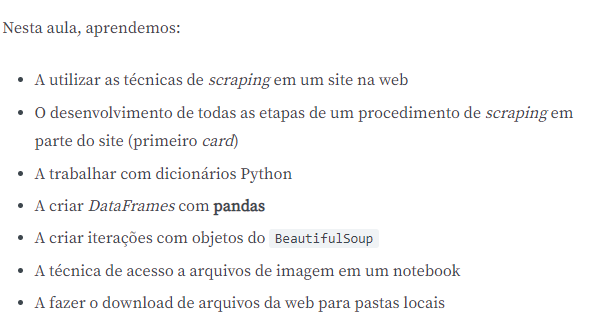

## 6 - Aplicar para todos os outros anuncios

### Identificando info HTML

In [345]:
soup.find('div', {'id': 'container-cards'})

<div id="container-cards" style="height: 100%">
<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
</div>
<div class="col-md-6 body-card">
<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>
<p class="txt-location">Belo Horizonte - MG</p>
</div>
<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>
</div>
<div class="well card">
<div class="col-md-3 ima

In [346]:
soup.find('div', {'id': 'container-cards'}).findAll('div', class_='card')

[<div class="well card">
 <div class="col-md-3 image-card">
 <img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
 </div>
 <div class="col-md-6 body-card">
 <p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
 <p class="txt-category badge badge-secondary inline">USADO</p>
 <p class="txt-motor">Motor 1.8 16v</p>
 <p class="txt-description">Ano 1993 - 55.286 km</p>
 <ul class="lst-items">
 <li class="txt-items">► 4 X 4</li>
 <li class="txt-items">► Câmera de estacionamento</li>
 <li class="txt-items">► Controle de tração</li>
 <li class="txt-items">► Sensor de estacionamento</li>
 <li class="txt-items">...</li>
 </ul>
 <p class="txt-location">Belo Horizonte - MG</p>
 </div>
 <div class="col-md-3 value-card">
 <div class="value">
 <p class="txt-value">R$ 338.000</p>
 </div>
 </div>
 </div>,
 <div class="well card">
 <div class="col-md-3 image-card">
 <img alt="

In [347]:
anuncios = soup.find('div', {'id': 'container-cards'}).findAll('div', class_='card')

In [348]:
#pulando duas linhas para cada card
for anuncio in anuncios:
    print(str(anuncio) + '\n\n')

<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="https://caelum-online-public.s3.amazonaws.com/1381-scraping/01/img-cars/lamborghini-aventador/lamborghini-aventador-2932196__340.jpg" width="220"/>
</div>
<div class="col-md-6 body-card">
<p class="txt-name inline">LAMBORGHINI AVENTADOR</p>
<p class="txt-category badge badge-secondary inline">USADO</p>
<p class="txt-motor">Motor 1.8 16v</p>
<p class="txt-description">Ano 1993 - 55.286 km</p>
<ul class="lst-items">
<li class="txt-items">► 4 X 4</li>
<li class="txt-items">► Câmera de estacionamento</li>
<li class="txt-items">► Controle de tração</li>
<li class="txt-items">► Sensor de estacionamento</li>
<li class="txt-items">...</li>
</ul>
<p class="txt-location">Belo Horizonte - MG</p>
</div>
<div class="col-md-3 value-card">
<div class="value">
<p class="txt-value">R$ 338.000</p>
</div>
</div>
</div>


<div class="well card">
<div class="col-md-3 image-card">
<img alt="Foto" height="155" src="ht

#### Criando a rotina scraping a partir dos codigos feitos anteriormente

##### O que foi criado anteriormente

In [349]:
# Valor
card['value'] = anuncio.find('p', {'class': 'txt-value'}).getText()

# Informações
infos = anuncio.find('div', {'class': 'body-card'}).findAll('p')
for info in infos:
    card[info.get('class')[0].split('-')[-1]] = info.get_text()

# Acessórios
items = anuncio.find('div', {'class': 'body-card'}).ul.findAll('li')
items.pop()
acessorios = []
for item in items:
    acessorios.append(item.get_text().replace('► ', ''))
card['items'] = acessorios

# Imagens
image = anuncio.find('div', {'class': 'image-card'}).img
urlretrieve(image.get('src'), './output/img/' + image.get('src').split('/')[-1])     


('./output/img/toyota-3245397__340.jpg',
 <http.client.HTTPMessage at 0x28fe972abe0>)

#### Código completo para scraping da pagina alura motors

In [350]:
# Importando bibliotecas
# from urllib.request import urlopen, urlretrieve
# from bs4 import BeautifulSoup
# import pandas as pd

# Declarando variável cards
cards = []

# Obtendo o HTML
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')

# Obtendo as TAGs de interesse
soup.find('div', {'id': 'container-cards'}).findAll('div', class_='card')

# Coletando as informações dos cards
for anuncio in anuncios:
    card = {}
    # Valor
    card['value'] = anuncio.find('p', {'class': 'txt-value'}).getText()

    # Informações
    infos = anuncio.find('div', {'class': 'body-card'}).findAll('p')
    for info in infos:
        card[info.get('class')[0].split('-')[-1]] = info.get_text()

    # Acessórios
    items = anuncio.find('div', {'class': 'body-card'}).ul.findAll('li')
    items.pop()
    acessorios = []
    for item in items:
        acessorios.append(item.get_text().replace('► ', ''))
    card['items'] = acessorios

# Adicionando resultado à lista cards
    cards.append(card)
    
    # Imagens
    image = anuncio.find('div', {'class': 'image-card'}).img
    urlretrieve(image.get('src'), './output/img/' + image.get('src').split('/')[-1]) 

# Criando um DataFrame com os resultados
dataset = pd.DataFrame(cards)
dataset.to_csv('./output/data/dataset.csv', sep=';', index = False, encoding = 'utf-8-sig')
dataset

,value,name,category,motor,description,location,items,opportunity
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN
1,R$ 346.000,BMW M2,USADO,Motor 3.0 32v,Ano 2018 - 83.447 km,Belo Horizonte - MG,"[Câmera de estacionamento, Controle de estabil...",NaN
2,R$ 480.000,ALFA,USADO,Motor 1.8 16v,Ano 2004 - 19.722 km,Rio de Janeiro - RJ,"[Central multimídia, Bancos de couro, Rodas de...",NaN
3,R$ 133.000,PUECH,USADO,Motor Diesel V8,Ano 1992 - 34.335 km,São Paulo - SP,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN
4,R$ 175.000,LAMBORGHINI MURCIELAGO,USADO,Motor 1.0 8v,Ano 1991 - 464 km,Belo Horizonte - MG,"[Central multimídia, Teto panorâmico, Sensor c...",NaN
5,R$ 239.000,ASTON MARTIN,USADO,Motor Diesel V6,Ano 2004 - 50.189 km,Belo Horizonte - MG,"[Painel digital, Controle de tração, Teto pano...",OPORTUNIDADE
6,R$ 115.000,TVR,USADO,Motor 4.0 Turbo,Ano 2014 - 17.778 km,Belo Horizonte - MG,"[4 X 4, Teto panorâmico, Central multimídia, C...",NaN
7,R$ 114.000,EXCALIBUR,USADO,Motor 3.0 32v,Ano 2009 - 81.251 km,Rio de Janeiro - RJ,"[Painel digital, Câmbio automático, Sensor de ...",NaN
8,R$ 75.000,MCLAREN,NOVO,Motor Diesel,Ano 2019 - 0 km,São Paulo - SP,"[Central multimídia, Câmera de estacionamento,...",NaN
9,R$ 117.000,TOYOTA,USADO,Motor 4.0 Turbo,Ano 1999 - 12.536 km,São Paulo - SP,"[Bancos de couro, Freios ABS, Piloto automátic...",OPORTUNIDADE


## 7 - Coletar todos os dados de todo o site

In [351]:
#verificando a tag de quantidade de paginas
soup.find('span', class_= 'info-pages')

<span class="info-pages">Página 1 de 25</span>

In [352]:
soup.find('span', class_= 'info-pages').get_text()

'Página 1 de 25'

In [353]:
soup.find('span', class_= 'info-pages').get_text().split()
#lista para cada item

['Página', '1', 'de', '25']

In [354]:
soup.find('span', class_= 'info-pages').get_text().split()[-1]
#para alcançar a ultima pagina (independente da quatidade que seja)

'25'

In [355]:
#para pagina inteiras
int(soup.find('span', class_= 'info-pages').get_text().split()[-1])

25

### Criando a rotina para todas as paginas

In [357]:
cards = []
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
pages = int(soup.find('span', class_= 'info-pages').get_text().split()[-1])
#Iterando por todas as paginas
for i in range(pages):
    #obtendo o HTML de cada pagina
    response = urlopen('https://alura-site-scraping.herokuapp.com/index.php?page=' + str(i + 1))
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    
    anuncios = soup.find('div', {'id': 'container-cards'}).findAll('div', class_='card')
    for anuncio in anuncios:
        card = {}
        card['value'] = anuncio.find('p', {'class': 'txt-value'}).getText()
        infos = anuncio.find('div', {'class': 'body-card'}).findAll('p')
        for info in infos:
            card[info.get('class')[0].split('-')[-1]] = info.get_text()
        items = anuncio.find('div', {'class': 'body-card'}).ul.findAll('li')
        items.pop()
        acessorios = []
        for item in items:
            acessorios.append(item.get_text().replace('► ', ''))
        card['items'] = acessorios
        cards.append(card)
        image = anuncio.find('div', {'class': 'image-card'}).img
        urlretrieve(image.get('src'), './output/img/' + image.get('src').split('/')[-1]) 

dataset = pd.DataFrame(cards)
dataset.to_csv('./output/data/dataset.csv', sep=';', index = False, encoding = 'utf-8-sig')
dataset

,value,name,category,motor,description,location,items,opportunity
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN
1,R$ 346.000,BMW M2,USADO,Motor 3.0 32v,Ano 2018 - 83.447 km,Belo Horizonte - MG,"[Câmera de estacionamento, Controle de estabil...",NaN
2,R$ 480.000,ALFA,USADO,Motor 1.8 16v,Ano 2004 - 19.722 km,Rio de Janeiro - RJ,"[Central multimídia, Bancos de couro, Rodas de...",NaN
3,R$ 133.000,PUECH,USADO,Motor Diesel V8,Ano 1992 - 34.335 km,São Paulo - SP,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN
4,R$ 175.000,LAMBORGHINI MURCIELAGO,USADO,Motor 1.0 8v,Ano 1991 - 464 km,Belo Horizonte - MG,"[Central multimídia, Teto panorâmico, Sensor c...",NaN
...,...,...,...,...,...,...,...,...
241,R$ 489.000,SUV REAR TIRE,USADO,Motor 3.0 32v,Ano 1998 - 74.292 km,São Paulo - SP,"[Câmera de estacionamento, Rodas de liga, Sens...",NaN
242,R$ 427.000,ANTIQUE,NOVO,Motor 2.0 16v,Ano 2019 - 0 km,Belo Horizonte - MG,"[Bancos de couro, Freios ABS, Sensor de estaci...",NaN
243,R$ 203.000,SPORT,USADO,Motor 2.0 16v,Ano 2001 - 102.776 km,Belo Horizonte - MG,"[Sensor crepuscular, Sensor de chuva, Vidros e...",NaN
244,R$ 474.000,IMPERIAL,USADO,Motor 1.8 16v,Ano 2011 - 101.787 km,Belo Horizonte - MG,"[Painel digital, Travas elétricas, Sensor de c...",OPORTUNIDADE
